In [1]:
import pandas as pd

## Preparing the Data for Cancer Type Classification

In [2]:
df_lung = pd.read_csv('/Users/ledamduyen/Desktop/CS 539/project/dataset/clean/lung.csv')
df_pancreatic = pd.read_csv('/Users/ledamduyen/Desktop/CS 539/project/dataset/clean/pancreatic.csv')
df_normal = pd.read_csv('/Users/ledamduyen/Desktop/CS 539/project/dataset/clean/normal.csv')

In [3]:
def create_combined_df(cancer_df, normal_df, random_state):
    cancer_count = len(cancer_df)
    normal_sample = normal_df.sample(n=cancer_count, random_state=random_state, replace=False)

    combined_df = pd.concat([cancer_df, normal_sample], ignore_index=True)
    return combined_df

In [4]:
df_lung_cancer = create_combined_df(df_lung, df_normal, 8)
df_pancreatic_cancer = create_combined_df(df_pancreatic, df_normal, 9)

In [5]:
# Preprocessing data
# Input df, return X,y for training
from sklearn.utils import shuffle

def preprocessing(df):
    
    # Drop type Columns
    if "type" in df.columns:
        df = df.drop(columns="type")

    # Convert 'cancer_type' column to binary type: normal = 0, other = 1
    if 'cancer_type' in df.columns and not df['cancer_type'].isin([0, 1]).all():
        df['cancer_type'] = df['cancer_type'].map({'normal': 0}).fillna(1).astype(int)
    
    # Get X,y
    target = 'cancer_type'
    X = df.drop(columns=target)
    y = df[target]
    
    return X,y

# Display proccesed data

X_l,y_l = preprocessing(df_lung_cancer)
X_p,y_p = preprocessing(df_pancreatic_cancer)

display(X_p,y_p)

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,10.190882,5.856793,5.504879,6.603939,2.589324,7.307193,4.505694,4.170773,6.811538,3.861369,...,12.410819,11.775152,13.730560,13.527400,10.939302,9.366024,10.029756,2.197022,2.549561,2.604475
1,10.397977,6.230170,5.870616,7.176309,2.447036,6.882623,4.827819,4.580666,7.868610,3.704774,...,12.250131,11.663606,13.807925,13.546156,10.223511,8.451554,9.192795,2.354645,2.411806,2.305854
2,9.697873,5.938232,5.303771,7.775848,2.396953,6.487590,4.965582,4.381057,6.377550,4.530656,...,12.542018,11.947975,13.688978,13.499380,10.443427,9.248596,9.575915,2.660606,2.822478,2.695719
3,9.493338,6.269669,5.874772,7.017075,2.444303,7.117745,4.463363,4.347028,9.268125,4.562947,...,12.096191,11.434712,13.689672,13.415672,9.411523,7.842530,8.400336,2.206494,2.397196,2.671649
4,10.360418,6.807520,9.385285,6.777342,2.821871,7.173666,4.515082,4.654198,6.902234,3.910507,...,12.133896,11.478597,13.636572,13.378688,9.378373,7.660518,8.366299,2.341204,2.608619,2.625820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,9.890654,5.992240,5.212611,10.059517,2.542138,7.321693,5.701188,4.616775,5.858608,3.949566,...,12.791088,12.125477,13.972744,13.892863,9.693684,7.364260,8.306983,2.468187,2.860115,2.826091
60,9.365680,5.965926,5.407865,8.050331,2.938916,6.472617,4.934719,4.186337,6.833240,5.257223,...,12.432145,11.833130,13.648058,13.391102,9.776251,8.534153,8.876821,2.412885,2.662891,2.668909
61,10.903770,7.245693,7.707139,9.959299,5.178917,8.770112,7.484030,6.332515,6.956309,5.454712,...,13.148153,12.787935,14.132452,13.957892,5.744669,5.596981,4.592644,4.328368,4.771192,4.834202
62,5.759644,7.821138,8.132814,7.781482,2.889190,8.167174,6.141597,4.088115,10.166836,3.780919,...,12.724064,12.197321,14.117278,14.055453,7.080774,4.763754,5.149368,2.764788,3.520711,3.320865


0     1
1     1
2     1
3     1
4     1
     ..
59    0
60    0
61    0
62    0
63    0
Name: cancer_type, Length: 64, dtype: int64

Feature Selection
Lung

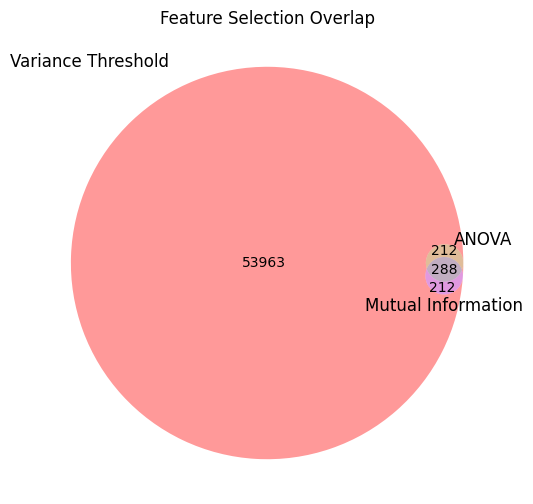

{'Variance Threshold': {'220460_at',
  '1561575_at',
  '204137_at',
  '227701_at',
  '223245_at',
  '244044_at',
  '239916_at',
  '217555_at',
  '216321_s_at',
  '203530_s_at',
  '212990_at',
  '213780_at',
  '226718_at',
  '233074_at',
  '1554349_at',
  '239989_at',
  '210227_at',
  '220045_at',
  '242957_at',
  '204874_x_at',
  '202198_s_at',
  '226157_at',
  '220109_at',
  '223336_s_at',
  '208117_s_at',
  '219205_at',
  '221371_at',
  '45297_at',
  '219027_s_at',
  '222958_s_at',
  '232055_at',
  '1556829_at',
  '237228_at',
  '210066_s_at',
  '231754_at',
  '219520_s_at',
  '1562607_at',
  '237409_at',
  '1558394_s_at',
  '220244_at',
  '237014_at',
  '215690_x_at',
  '229903_x_at',
  '1556285_s_at',
  '230403_at',
  '236957_at',
  '208973_at',
  '220476_s_at',
  '202227_s_at',
  '229004_at',
  '1556783_a_at',
  '1568898_at',
  '205799_s_at',
  '218406_x_at',
  '1570122_at',
  '220524_at',
  '226158_at',
  '202143_s_at',
  '217862_at',
  '242924_at',
  '202847_at',
  '211919_s_at'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif

def feature_selection_with_venn(X, y, variance_threshold=0.001, k_anova=500, k_mutual=500):
    
    # Method 1: Variance Threshold
    selector = VarianceThreshold(threshold=variance_threshold)
    selector.fit(X)
    variance_features = set(X.columns[selector.get_support(indices=True)])

    # Method 2: ANOVA F-statistic
    anova_selector = SelectKBest(score_func=f_classif, k=k_anova)
    anova_selector.fit(X, y)
    anova_features = set(X.columns[anova_selector.get_support(indices=True)])

    # Method 3: Mutual Information
    mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=k_mutual)
    mutual_info_selector.fit(X, y)
    mutual_info_features = set(X.columns[mutual_info_selector.get_support(indices=True)])

    # Visualize overlap with Venn diagram
    plt.figure(figsize=(8, 6))
    venn_diagram = venn3(
        subsets=(
            len(variance_features - anova_features - mutual_info_features),  # Only Variance
            len(anova_features - variance_features - mutual_info_features),  # Only ANOVA
            len(variance_features & anova_features - mutual_info_features),  # Variance & ANOVA
            len(mutual_info_features - variance_features - anova_features),  # Only Mutual Info
            len(variance_features & mutual_info_features - anova_features),  # Variance & Mutual Info
            len(anova_features & mutual_info_features - variance_features),  # ANOVA & Mutual Info
            len(variance_features & anova_features & mutual_info_features),  # All 3 Methods
        ),
        set_labels=("Variance Threshold", "ANOVA", "Mutual Information"),
    )
    plt.title("Feature Selection Overlap")
    plt.show()

    # Return selected features
    return {
        "Variance Threshold": variance_features,
        "ANOVA": anova_features,
        "Mutual Information": mutual_info_features
    }

feature_selection_with_venn(X_l, y_l, variance_threshold=0.001, k_anova=500, k_mutual=500)

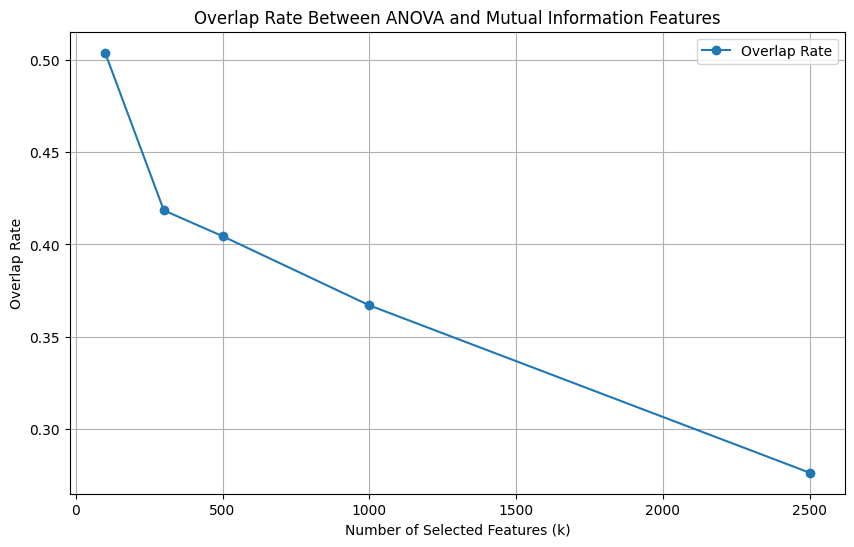

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
import matplotlib.pyplot as plt

def analyze_feature_overlap(X, y, k_values):
    
    overlap_results = {}

    overlap_rates = []  # Store overlap rates for each k
    for k in k_values:
        # Select features using ANOVA
        anova_selector = SelectKBest(score_func=f_classif, k=k)
        anova_features = set(X.columns[anova_selector.fit(X, y).get_support()])

        # Select features using Mutual Information
        mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=k)
        mutual_info_features = set(X.columns[mutual_info_selector.fit(X, y).get_support()])

        # Calculate overlap details
        intersection = anova_features & mutual_info_features
        union = anova_features | mutual_info_features
        overlap_rate = len(intersection) / len(union) if union else 0

        # Store results
        overlap_results[k] = {
            "anova_features": anova_features,
            "mutual_info_features": mutual_info_features,
            "overlap_features": intersection,
            "overlap_rate": overlap_rate
        }

        overlap_rates.append(overlap_rate)

    # Plot overlap rates
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, overlap_rates, marker="o", linestyle="-", label="Overlap Rate")
    plt.title("Overlap Rate Between ANOVA and Mutual Information Features")
    plt.xlabel("Number of Selected Features (k)")
    plt.ylabel("Overlap Rate")
    plt.grid(True)
    plt.legend()
    plt.show()

    return overlap_results

k_l_values = [100, 300, 500, 1000, 2500]
overlap_results = analyze_feature_overlap(X_l, y_l, k_l_values)

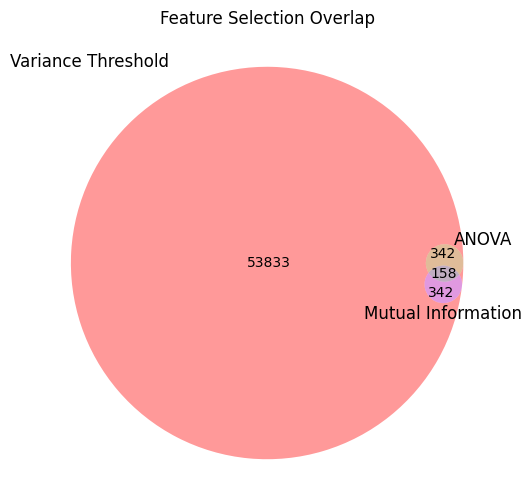

{'Variance Threshold': {'220460_at',
  '1561575_at',
  '204137_at',
  '227701_at',
  '223245_at',
  '244044_at',
  '239916_at',
  '217555_at',
  '216321_s_at',
  '203530_s_at',
  '212990_at',
  '213780_at',
  '226718_at',
  '233074_at',
  '1554349_at',
  '239989_at',
  '210227_at',
  '220045_at',
  '242957_at',
  '204874_x_at',
  '202198_s_at',
  '226157_at',
  '220109_at',
  '223336_s_at',
  '208117_s_at',
  '219205_at',
  '221371_at',
  '45297_at',
  '219027_s_at',
  '222958_s_at',
  '232055_at',
  '1556829_at',
  '237228_at',
  '210066_s_at',
  '231754_at',
  '219520_s_at',
  '1562607_at',
  '237409_at',
  '1558394_s_at',
  '220244_at',
  '237014_at',
  '215690_x_at',
  '229903_x_at',
  '1556285_s_at',
  '230403_at',
  '236957_at',
  '208973_at',
  '220476_s_at',
  '202227_s_at',
  '229004_at',
  '1556783_a_at',
  '1568898_at',
  '205799_s_at',
  '218406_x_at',
  '1570122_at',
  '220524_at',
  '226158_at',
  '202143_s_at',
  '217862_at',
  '242924_at',
  '202847_at',
  '211919_s_at'

In [8]:
feature_selection_with_venn(X_p, y_p, variance_threshold=0.001, k_anova=500, k_mutual=500)

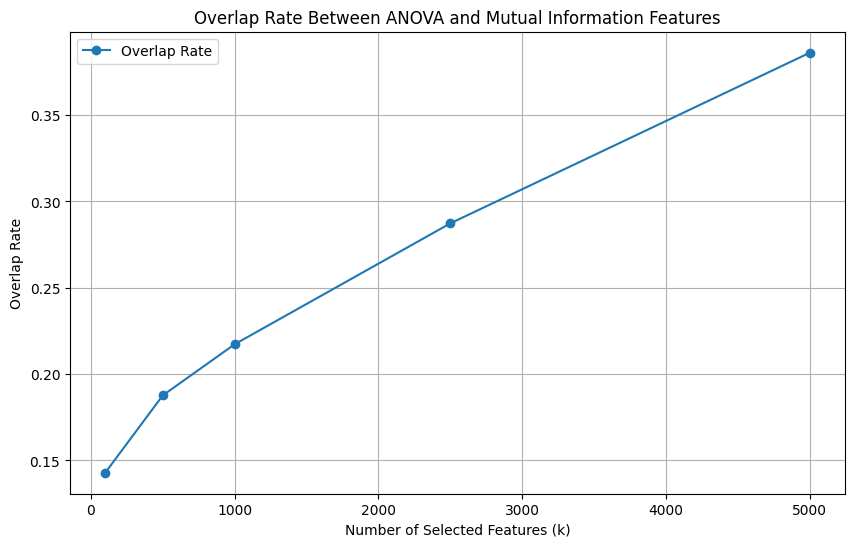

In [10]:
k_p_values = [100, 500, 1000, 2500, 5000]
overlap_results = analyze_feature_overlap(X_p, y_p, k_p_values)

In [11]:
def feature_selection(X, y, k_anova=500, k_mutual=500, combine_features=True):
    
    # Perform ANOVA feature selection
    anova_selector = SelectKBest(score_func=f_classif, k=k_anova)
    anova_selector.fit(X, y)
    X_anova = set(X.columns[anova_selector.get_support()])

    # Perform Mutual Information feature selection
    mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=k_mutual)
    mutual_info_selector.fit(X, y)
    X_mut = set(X.columns[mutual_info_selector.get_support()])

    # Combine or reduce overlap between features
    if combine_features:
        selected_features = X_anova.union(X_mut)  # Combine features (union)
    else:
        selected_features = X_anova.intersection(X_mut)  # Reduce overlap (intersection)

    # Subset data with selected features
    X_reduce = X[list(selected_features)]
    return X_reduce

X_l = feature_selection(X_l, y_l, k_anova=100, k_mutual=100, combine_features=True)
X_p = feature_selection(X_p, y_p, k_anova=500, k_mutual=500, combine_features=True)

## Training the Models and Returning their LOOCV Score

I tested both Logistic Regression and Random Forest for these models, but for the final model I recommend the Logistic Regression model only. For the subtype classification and final function I will only use the LR model

In [12]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Define 5-fold cross-validation
kf_lung_classification_lr = KFold(n_splits=5, shuffle=True, random_state=42)
lung_classification_lr = LogisticRegression(max_iter=5000)

# Initialize lists to store true and predicted values
y_true_lung_classification_lr = []
y_pred_lung_classification_lr = []

# Perform 5-fold cross-validation
for train_index, test_index in kf_lung_classification_lr.split(X_l):
    X_train, X_test = X_l.iloc[train_index], X_l.iloc[test_index]
    y_train, y_test = y_l.iloc[train_index], y_l.iloc[test_index]

    # Train the model
    lung_classification_lr.fit(X_train, y_train)

    # Predict on the test set
    y_pred_lung_classification_lr.extend(lung_classification_lr.predict(X_test))
    y_true_lung_classification_lr.extend(y_test.tolist())

In [14]:
from sklearn.metrics import accuracy_score

lung_classification_lr_accuracy = accuracy_score(y_true_lung_classification_lr, y_pred_lung_classification_lr)
print(f'LOOCV Score: {lung_classification_lr_accuracy * 100:.2f}%')


LOOCV Score: 98.70%


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Define 5-fold cross-validation
kf_lung_classification_rf = KFold(n_splits=5, shuffle=True, random_state=42)
lung_classification_rf = RandomForestClassifier(n_estimators=500, random_state=42)

# Initialize lists to store true and predicted values
y_true_lung_classification_rf = []
y_pred_lung_classification_rf = []

# Perform 5-fold cross-validation
for train_index, test_index in kf_lung_classification_rf.split(X_l):
    X_train, X_test = X_l.iloc[train_index], X_l.iloc[test_index]
    y_train, y_test = y_l.iloc[train_index], y_l.iloc[test_index]

    # Train the Random Forest model
    lung_classification_rf.fit(X_train, y_train)

    # Predict on the test set
    y_pred_lung_classification_rf.extend(lung_classification_rf.predict(X_test))
    y_true_lung_classification_rf.extend(y_test.tolist())


In [16]:
lung_classification_rf_accuracy = accuracy_score(y_true_lung_classification_rf, y_pred_lung_classification_rf)
print(f'LOOCV Score: {lung_classification_rf_accuracy * 100:.2f}%')

LOOCV Score: 98.70%


In [17]:
# Define 5-fold cross-validation
kf_pancreatic_classification_lr = KFold(n_splits=5, shuffle=True, random_state=42)
pancreatic_classification_lr = LogisticRegression(max_iter=5000)

# Initialize lists to store true and predicted values
y_true_pancreatic_classification_lr = []
y_pred_pancreatic_classification_lr = []

# Perform 5-fold cross-validation
for train_index, test_index in kf_pancreatic_classification_lr.split(X_p):
    X_train, X_test = X_p.iloc[train_index], X_p.iloc[test_index]
    y_train, y_test = y_p.iloc[train_index], y_p.iloc[test_index]

    # Train the model
    pancreatic_classification_lr.fit(X_train, y_train)

    # Predict on the test set
    y_pred_pancreatic_classification_lr.extend(pancreatic_classification_lr.predict(X_test))
    y_true_pancreatic_classification_lr.extend(y_test.tolist())

In [18]:
pancreatic_classification_lr_accuracy = accuracy_score(y_true_pancreatic_classification_lr, y_pred_pancreatic_classification_lr)
print(f'LOOCV Score: {pancreatic_classification_lr_accuracy * 100:.2f}%')

LOOCV Score: 96.88%


In [19]:
# Define 5-fold cross-validation
kf_pancreatic_classification_rf = KFold(n_splits=5, shuffle=True, random_state=42)
pancreatic_classification_rf = RandomForestClassifier(n_estimators=500, random_state=42)

# Initialize lists to store true and predicted values
y_true_pancreatic_classification_rf = []
y_pred_pancreatic_classification_rf = []

# Perform 5-fold cross-validation
for train_index, test_index in kf_pancreatic_classification_rf.split(X_p):
    X_train, X_test = X_p.iloc[train_index], X_p.iloc[test_index]
    y_train, y_test = y_p.iloc[train_index], y_p.iloc[test_index]

    # Train the Random Forest model
    pancreatic_classification_rf.fit(X_train, y_train)

    # Predict on the test set
    y_pred_pancreatic_classification_rf.extend(pancreatic_classification_rf.predict(X_test))
    y_true_pancreatic_classification_rf.extend(y_test.tolist())

In [20]:
pancreatic_classification_rf_accuracy = accuracy_score(y_true_pancreatic_classification_rf, y_pred_pancreatic_classification_rf)
print(f'LOOCV Score: {pancreatic_classification_rf_accuracy * 100:.2f}%')

LOOCV Score: 98.44%


In [16]:
df_test = pd.read_csv('/Users/ledamduyen/Desktop/CS 539/project/dataset/clean/test_data.csv')
df_colorectal_test = df_test[df_test['cancer_type'].isin(['normal', 'colorectal'])]
df_gastric_test = df_test[df_test['cancer_type'].isin(['normal', 'gastric'])]
df_leukemia_test = df_test[df_test['cancer_type'].isin(['normal', 'leukemia'])]

## Preparing the Data for Cancer Sub-Type Classification

In [ ]:
df_gastric_cancer['type'].unique()

array(['tumoral', 'adenocarcinoma', 'normal'], dtype=object)

In [17]:
def preprocessing_sub(df):
    
    # Drop cancer_type Columns
    if "cancer_type" in df.columns:
        df = df.drop(columns="cancer_type")

    # Custom mapping for normal
    custom_mapping = {'normal': 0}  # Assign 'normal' to 0
    other_values = {value: idx for idx, value in enumerate(df['type'].unique(), start=1) if value not in custom_mapping}
    mapping = {**custom_mapping, **other_values}
    df['type'] = df['type'].map(mapping)

    # Get X,y
    target = 'type'
    X = df.drop(columns=target)
    y = df[target]
    
    return X,y

# Display proccesed data

Xs_c,ys_c = preprocessing_sub(df_colorectal_cancer)
Xs_g,ys_g = preprocessing_sub(df_gastric_cancer)

display(Xs_g,ys_g)

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,8.729061,5.180322,4.608926,5.647848,2.042212,7.206777,4.422622,2.755938,8.812442,2.573335,...,11.164609,10.775514,12.857273,12.731003,9.234305,8.248071,8.344889,1.631211,1.978618,1.892722
1,9.001334,6.617095,4.395646,7.123623,3.241733,5.498223,4.243900,2.925823,4.534666,1.964338,...,10.788976,10.302022,12.440039,12.300295,8.163385,7.362267,7.501064,1.756396,1.977184,2.015272
2,8.159827,5.926430,5.122536,6.226437,2.019512,6.624482,4.551800,2.767274,7.986535,2.210271,...,11.187776,10.748935,12.665790,12.592801,8.167704,6.801099,6.979345,1.662133,2.070686,1.924248
3,9.559118,7.043322,4.971121,6.768600,2.671845,6.883452,4.032452,3.171697,6.465104,4.093294,...,10.731669,10.294698,12.534455,12.378446,7.685660,5.212969,6.233874,1.731197,1.949998,2.027056
4,8.257840,6.268110,5.317055,6.096988,2.095831,5.882465,4.526486,2.666876,7.004057,1.829208,...,10.663157,10.080286,12.349305,12.303505,7.658543,6.624243,6.809690,1.617277,2.042376,2.088563
5,8.268637,5.673706,4.041234,5.940841,2.092022,7.395003,5.180165,2.788542,8.337760,2.372710,...,11.630287,11.226991,12.952052,12.891272,9.438176,6.562677,7.899977,1.713044,2.031004,1.826066
6,8.072856,6.055937,5.026100,6.050280,1.739597,6.663004,4.890627,2.831725,8.391452,2.391750,...,11.234398,10.733645,12.696144,12.586035,7.879248,6.413369,6.656621,1.630604,1.974087,2.036339
7,7.680028,5.894405,5.199329,6.307540,1.902920,6.742952,4.502145,2.649148,7.964943,2.582655,...,10.878437,10.401695,12.390470,12.366916,7.831222,6.800263,6.979293,1.630654,1.879426,1.925260
8,8.451915,5.863011,4.382178,6.026346,1.947833,6.923885,4.499549,3.016640,7.658565,2.525693,...,10.781520,10.428310,12.621985,12.550523,8.586549,7.755926,7.762786,1.655331,1.823594,1.941182
9,8.123749,5.428503,4.366489,5.876885,1.968247,6.917033,4.814167,2.804359,8.314080,2.925554,...,11.172940,10.922962,12.603767,12.570259,8.182451,6.412731,6.597469,1.592001,2.002152,2.093622


0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
Name: type, dtype: int64

## Sub-Type Classification using Logistic Regression and LOOCV Score

In [18]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# PCA and Logistic Regression
def kfold_with_pca(X, y, n_components):
    """
    Perform K-Fold Cross-Validation with PCA and Logistic Regression.

    Parameters:
    - X (pd.DataFrame): Feature matrix.
    - y (pd.Series): Target variable.
    - n_components (int): Number of PCA components.
    - n_splits (int): Number of folds for K-Fold Cross-Validation.

    Returns:
    - float: Mean accuracy across folds.
    """
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    pca = PCA(n_components=n_components)
    model = LogisticRegression(max_iter=200)

    accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PCA on the training data
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Fit the model
        model.fit(X_train_pca, y_train)

        # Make predictions
        y_pred = model.predict(X_test_pca)

        # Calculate accuracy
        accuracies.append(accuracy_score(y_test, y_pred))

    # Return mean accuracy
    return np.mean(accuracies)


In [19]:
for n in [100, 500, 1000, 2500]:
    accuracy = kfold_with_pca(Xs_c, ys_c, n_components=n)
    print(f"5-Fold CV Accuracy with {n} PCA components: {accuracy * 100:.2f}%")

NameError: name 'np' is not defined

In [ ]:
X_gastric_subtype = df_gastric_subtype_classification.drop(columns = ['type'])
y_gastric_subtype = df_gastric_subtype_classification['type']

loo_gastric_subtype_lr = LeaveOneOut()
gastric_subtype_lr = LogisticRegression(max_iter = 200)

y_true_gastric_subtype_lr = []
y_pred_gastric_subtype_lr = []

for train_index, test_index in loo_gastric_subtype_lr.split(X_gastric_subtype):
    X_train, X_test = X_gastric_subtype.iloc[train_index], X_gastric_subtype.iloc[test_index]
    y_train, y_test = y_gastric_subtype.iloc[train_index], y_gastric_subtype.iloc[test_index]

    gastric_subtype_lr.fit(X_train, y_train)

    y_pred_gastric_subtype_lr.append(gastric_subtype_lr.predict(X_test)[0])
    y_true_gastric_subtype_lr.append(y_test.iloc[0])

# LOOCV accuracy is 100%

In [ ]:
gastric_subtype_lr_accuracy = accuracy_score(y_true_gastric_subtype_lr, y_pred_gastric_subtype_lr)
print(f'LOOCV Score: {gastric_subtype_lr_accuracy * 100:.2f}%')

LOOCV Score: 100.00%


In [ ]:
X_leukemia_subtype = df_leukemia_subtype_classification.drop(columns = ['type'])
y_leukemia_subtype = df_leukemia_subtype_classification['type']

loo_leukemia_subtype_lr = LeaveOneOut()
leukemia_subtype_lr = LogisticRegression(max_iter = 200)

y_true_leukemia_subtype_lr = []
y_pred_leukemia_subtype_lr = []

for train_index, test_index in loo_leukemia_subtype_lr.split(X_leukemia_subtype):
    X_train, X_test = X_leukemia_subtype.iloc[train_index], X_leukemia_subtype.iloc[test_index]
    y_train, y_test = y_leukemia_subtype.iloc[train_index], y_leukemia_subtype.iloc[test_index]

    leukemia_subtype_lr.fit(X_train, y_train)

    y_pred_leukemia_subtype_lr.append(leukemia_subtype_lr.predict(X_test)[0])
    y_true_leukemia_subtype_lr.append(y_test.iloc[0])

# LOOCV accuracy is 100%

In [ ]:
leukemia_subtype_lr_accuracy = accuracy_score(y_true_leukemia_subtype_lr, y_pred_leukemia_subtype_lr)
print(f'LOOCV Score: {leukemia_subtype_lr_accuracy * 100:.2f}%')

LOOCV Score: 100.00%


## Functions to Return Cancer Classification Probabilities for Logistic Regression

The following are basic functions that utilize the trained logistic regression models to return the class (whether it is the type of cancer or normal), as well as the probabilities

In [ ]:
def colorectal_lr(X_features):
    model = colorectal_classification_lr
    y_pred = model.predict(X_features)
    y_pred_prob = model.predict_proba(X_features)

    return y_pred, y_pred_prob

In [ ]:
classes, probs = colorectal_lr(X_colorectal_type)
for i in range(10):
    print(classes[i], probs[i])

colorectal [0.99846371 0.00153629]
colorectal [9.99987817e-01 1.21827471e-05]
colorectal [9.99978543e-01 2.14571929e-05]
colorectal [9.99999923e-01 7.65182901e-08]
colorectal [0.99890875 0.00109125]
colorectal [9.99993924e-01 6.07558017e-06]
colorectal [9.99992893e-01 7.10714267e-06]
colorectal [9.99999980e-01 2.02485687e-08]
colorectal [9.99998222e-01 1.77841676e-06]
colorectal [9.99999044e-01 9.56078693e-07]


In [ ]:
def gastric_lr(X_features):
    model = gastric_classification_lr
    y_pred = model.predict(X_features)
    y_pred_prob = model.predict_proba(X_features)

    return y_pred, y_pred_prob

In [ ]:
classes, probs = gastric_lr(X_gastric_type)
for i in range(10):
    print(classes[i], probs[i])

gastric [9.99984549e-01 1.54508684e-05]
gastric [9.99975461e-01 2.45390724e-05]
gastric [9.99954576e-01 4.54244250e-05]
gastric [9.99968345e-01 3.16551209e-05]
gastric [9.99962693e-01 3.73071462e-05]
gastric [9.99922916e-01 7.70843369e-05]
gastric [9.99991796e-01 8.20380857e-06]
gastric [9.99964757e-01 3.52430527e-05]
gastric [9.99994984e-01 5.01635003e-06]
gastric [9.99812126e-01 1.87874176e-04]


In [ ]:
def leukemia_lr(X_features):
    model = leukemia_classification_lr
    y_pred = model.predict(X_features)
    y_pred_prob = model.predict_proba(X_features)

    return y_pred, y_pred_prob

In [ ]:
classes, probs = leukemia_lr(X_leukemia_type)
for i in range(10):
    print(classes[i], probs[i])

leukemia [9.99999997e-01 2.67787218e-09]
leukemia [9.99999999e-01 1.22675544e-09]
leukemia [1.00000000e+00 1.68706056e-11]
leukemia [1.00000000e+00 1.84591998e-11]
leukemia [1.00000000e+00 3.13739624e-11]
leukemia [9.99999999e-01 1.37428056e-09]
leukemia [9.99999918e-01 8.22915531e-08]
leukemia [1.00000000e+00 1.10577366e-10]
leukemia [9.99999999e-01 1.18486184e-09]
leukemia [9.99999999e-01 7.74379038e-10]
